In [1]:
import sys
import glob
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Add parent directory to Python path to find local modules
sys.path.insert(0, '..')

In [3]:
from utils.utils import parse_nccl_log, parse_multiple_logs, performance_data_to_dataframe

In [4]:
from utils.plotting import plot_nccl_performance, plot_nccl_comparison_matrix

## Input files

In [12]:
log_files = glob.glob('../logs/may16/slurm-May16-3876738*.out')

In [13]:
log_files

['../logs/may16/slurm-May16-38767381.out',
 '../logs/may16/slurm-May16-38767382.out',
 '../logs/may16/slurm-May16-38767388.out',
 '../logs/may16/slurm-May16-38767386.out',
 '../logs/may16/slurm-May16-38767384.out',
 '../logs/may16/slurm-May16-38767383.out']

## Extract performance data

In [7]:
all_perf_data = [parse_nccl_log(log_file) for log_file in log_files]

In [8]:
perf_df = performance_data_to_dataframe(all_perf_data)

In [9]:
perf_df.head()

,jobid,nccl_version,uses_alt_read,num_nodes,num_gpus,avg_bus_bandwidth,size_bytes,count_elements,type,redop,root,oop_time_us,oop_algbw_gbps,oop_busbw_gbps,oop_wrong,ip_time_us,ip_algbw_gbps,ip_busbw_gbps,ip_wrong
0,38767381,2.19.4,False,2,8,40.1793,32768,8192,float,sum,-1,67.50,0.49,0.85,0,51.80,0.63,1.11,0
1,38767381,2.19.4,False,2,8,40.1793,65536,16384,float,sum,-1,52.01,1.26,2.21,0,38.43,1.71,2.98,0
2,38767381,2.19.4,False,2,8,40.1793,131072,32768,float,sum,-1,84.65,1.55,2.71,0,86.20,1.52,2.66,0
3,38767381,2.19.4,False,2,8,40.1793,262144,65536,float,sum,-1,139.10,1.88,3.30,0,109.70,2.39,4.18,0
4,38767381,2.19.4,False,2,8,40.1793,524288,131072,float,sum,-1,429.60,1.22,2.14,0,158.60,3.31,5.79,0


## Visualizations

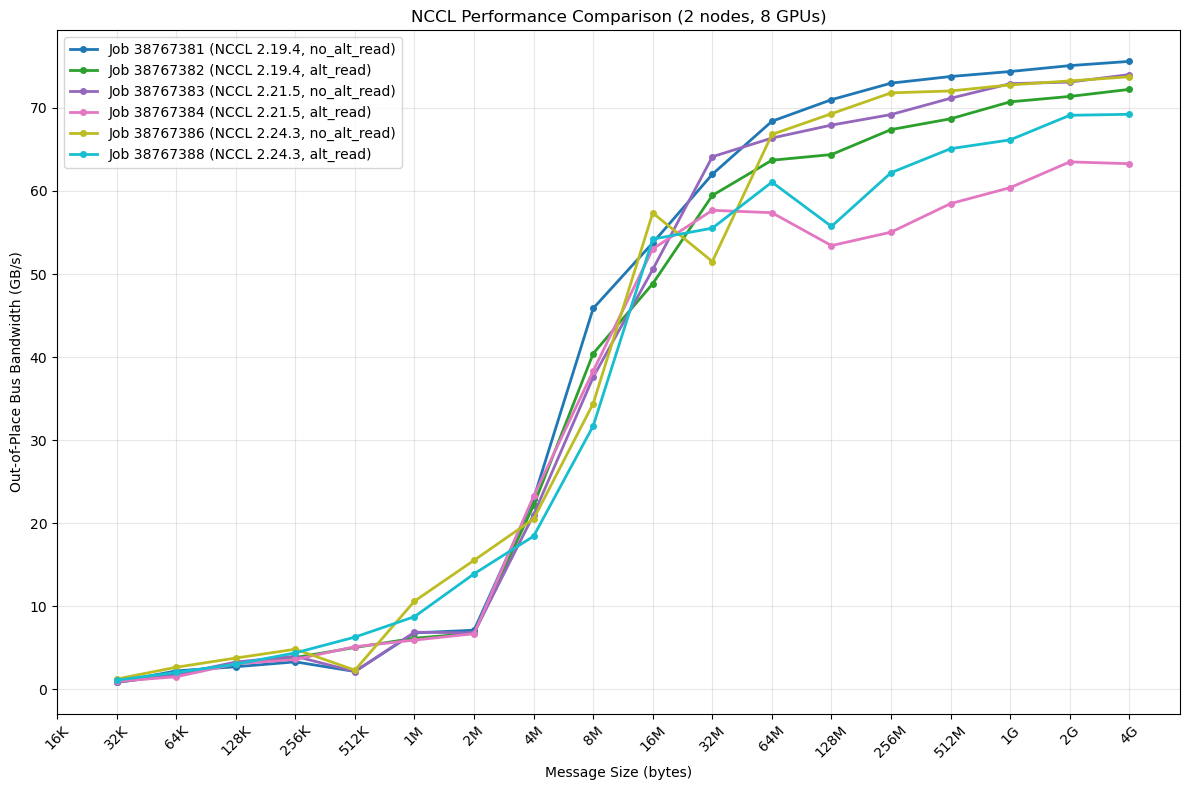

In [10]:
plot_nccl_performance(perf_df, target_num_nodes=2);